In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

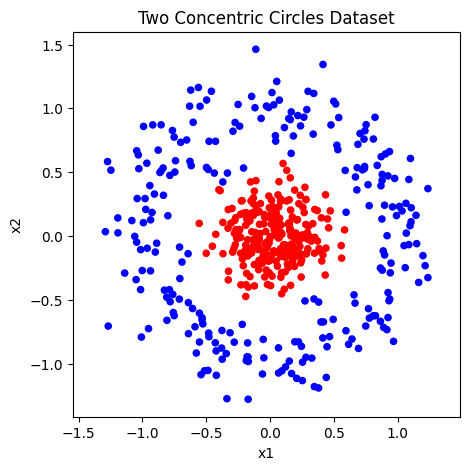

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(
    n_samples=500,
    noise=0.15,    
    factor=0.2, 
    random_state=42
)

# Plot
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=20)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Two Concentric Circles Dataset")
plt.axis("equal")
plt.show()


In [3]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [4]:
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32).view(-1,1)  # (500,1)

In [5]:
ANNclassify = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.Sigmoid()
)

In [6]:
lossfun = nn.BCELoss()
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = 0.05)

In [7]:
epochs = 2000
losses = []

for epoch in range(epochs):

    y_hat = ANNclassify(X_t)

    loss = lossfun(y_hat, y_t)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch:4d} | Loss = {loss.item():.4f}")


Epoch    0 | Loss = 0.6993
Epoch  200 | Loss = 0.6411
Epoch  400 | Loss = 0.4755
Epoch  600 | Loss = 0.1865
Epoch  800 | Loss = 0.0825
Epoch 1000 | Loss = 0.0533
Epoch 1200 | Loss = 0.0404
Epoch 1400 | Loss = 0.0332
Epoch 1600 | Loss = 0.0285
Epoch 1800 | Loss = 0.0252


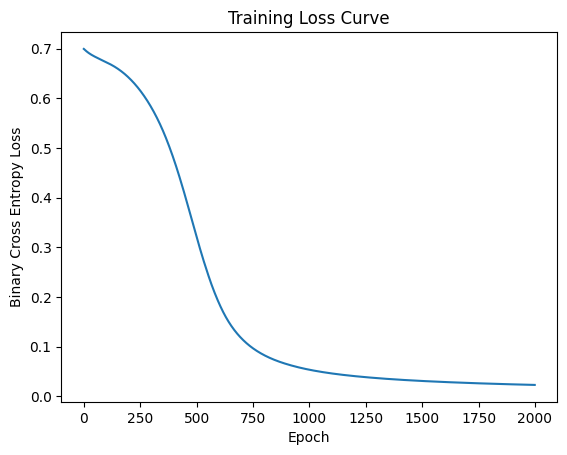

In [8]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Training Loss Curve")
plt.show()

In [9]:
with torch.no_grad():
    predictions = ANNclassify(X_t)
    predicted_class = (predictions > 0.5).float()

accuracy = (predicted_class == y_t).float().mean()
print(f"Training Accuracy: {accuracy.item()*100:.2f}%")


Training Accuracy: 99.80%


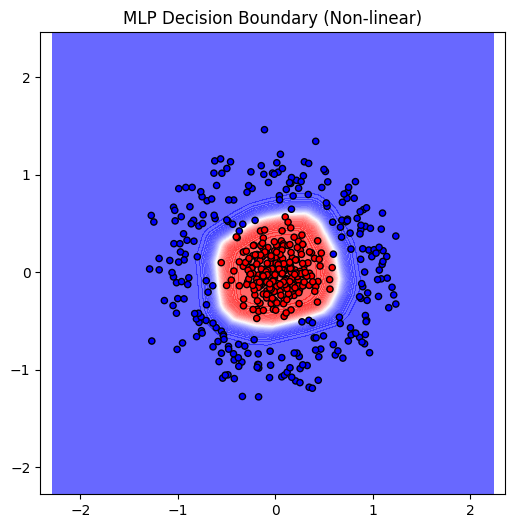

In [10]:
xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_t = torch.tensor(grid, dtype=torch.float32)

with torch.no_grad():
    probs = ANNclassify(grid_t).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, probs, levels=50, cmap='bwr', alpha=0.6)
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=20, edgecolors='k')
plt.title("MLP Decision Boundary (Non-linear)")
plt.axis("equal")
plt.show()
